In [1]:
%load_ext Cython
import numpy as np
def du_dt(u,v):
    return -v

def dv_dt(u,v):
    return u

a,b,u_0,v_0=0,1000,1,0

def solve_oed_struc_d2(a, b, n, u_0, v_0):
    dt = (b - a) / n
    u = np.zeros(n+1)
    v = np.zeros(n+1)

    u[0], v[0] = u_0, v_0

    a = np.array([[2,dt],[-dt,2]])
    for i in range(n):
        b = np.dot([[2, -dt], [dt, 2]], [[u[i]], [v[i]]])
        b=b.ravel()
        u[i+1],v[i+1]=np.linalg.solve(a,b)

    return (u,v)

def culc_err(a,b,n,true_u,true_v,solve_oed):
    """_summary_

    Args:
        a (_float_):_始値_
        b(_float_):_終値_
        n (_int_): _分割数_
        true_u (_func_): _uの厳密解_
        true_v (_func_): _vの厳密解_

    Returns:
        _float64_: _相対誤差_
    """
    t=np.linspace(a,b,n+1)
    u,v=solve_oed(a,b,n,u_0,v_0)
    true_u_list=[true_u(i) for i in t]
    true_v_list=[true_v(i) for i in t]
    return np.max(np.abs(np.concatenate([true_u_list-u,true_v_list-v])))/np.max(np.abs(np.concatenate([true_u_list,true_v_list])))


In [2]:
def true_u(x):
    return np.cos(x)

def true_v(x):
    return np.sin(x)
n=1000
e_n=[culc_err(a,b,i+1,true_u,true_v,solve_oed_struc_d2) for i in range(n)]


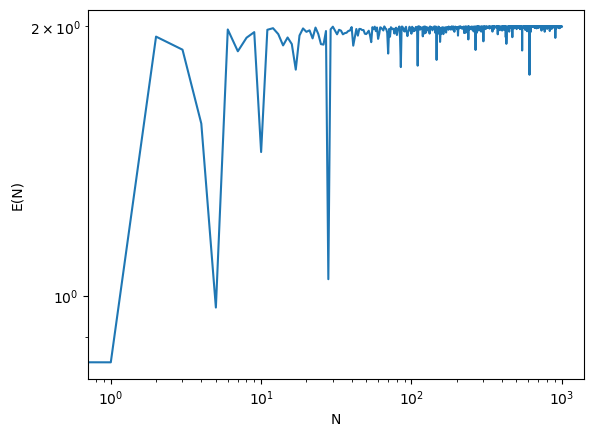

In [3]:
import matplotlib.pyplot as plt

x=np.linspace(a,b,len(e_n))

plt.plot(x,e_n)
plt.xlabel("N")
plt.ylabel("E(N)")
plt.xscale("log")
plt.yscale("log")
plt.savefig("1SC22317Y05b01.pdf")
plt.show()


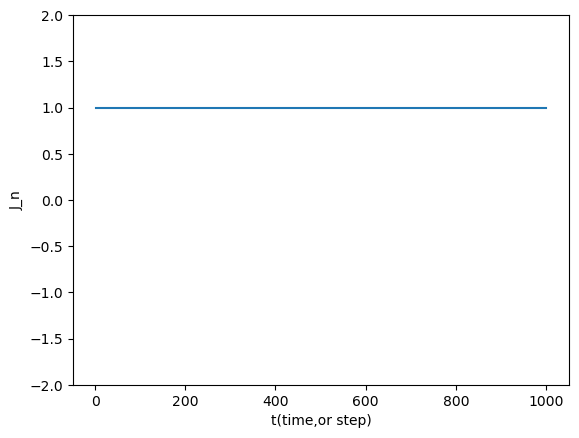

In [8]:
u_n,v_n=solve_oed_struc_d2(a,b,n,u_0,v_0)
j_n=u_n**2+v_n**2

y=[i+1 for i in range(len(j_n))]
plt.plot(y,j_n)
plt.xlabel("t(time,or step)")
plt.ylabel("J_n")
plt.ylim(-2,2)
plt.savefig("1SC22317Y05b02.pdf")
plt.show()

In [5]:
j_n

array([1., 1., 1., ..., 1., 1., 1.])